In [1]:
%load_ext autoreload
%autoreload 2

# Nonlinear Segway Model

For the nonlinear model, we can directly apply the control law to the original nonlinear system without linearization. From previous calculation, the model can be represented as:
$$
\begin{align}
M(q) \ddot{q} + C(q, \dot{q}) \dot{q} + G(q) = \tau,
\end{align}
$$

Where:
$$
\begin{align}
M(q) &= \begin{bmatrix}m + m_w & m h \cos \gamma \\
m h \cos \gamma & m h^2 + I\end{bmatrix}, \\
C(q, \dot{q}) &= \begin{bmatrix} 0 & - m h \dot{\gamma} \sin \gamma \\
 0 & 0\end{bmatrix}, \\
G(q) &= \begin{bmatrix}0 \\
- m g h \sin \gamma\end{bmatrix}, \\
\tau &= \begin{bmatrix}\frac{M}{R} \\
-M\end{bmatrix}.
\end{align}
$$

First leave $\ddot{q}$ alone, we can rewrite the system as:
$$
\begin{align}\ddot{q} = M(q)^{-1} (\tau - C(q, \dot{q}) \dot{q} - G(q)) = N(q) (\tau - C(q, \dot{q}) \dot{q} - G(q)),
\end{align}
$$

We can expand $q$ into $x$ and $\gamma$ to get:
$$
\begin{align}\begin{bmatrix}\ddot{x} \\
\ddot{\gamma}\end{bmatrix} = N(q) \left(\begin{bmatrix}\frac{M}{R} \\
-M\end{bmatrix} - C(q, \dot{q}) \begin{bmatrix}\dot{x} \\
\dot{\gamma}\end{bmatrix} - G(q)\right).
\end{align}
$$

To make it easier of code implementation, we can further expand the above equation to get:
$$
\begin{align}\ddot{x} &= N_{11} \left(\frac{M}{R} - C_{11} \dot{x} - C_{12} \dot{\gamma} - G_1\right) + N_{12} \left(-M - C_{21} \dot{x} - C_{22} \dot{\gamma} - G_2\right), \\
\ddot{\gamma} &= N_{21} \left(\frac{M}{R} - C_{11} \dot{x} - C_{12} \dot{\gamma} - G_1\right) + N_{22} \left(-M - C_{21} \dot{x} - C_{22} \dot{\gamma} - G_2\right).
\end{align}
$$

Plug in $C$ and $G$, we can get:
$$
\begin{align}\ddot{x} &= N_{11} \left(\frac{M}{R} + m h \dot{\gamma}^2 \sin \gamma\right) + N_{12} \left(-M + m g h \sin \gamma\right), \\
\ddot{\gamma} &= N_{21} \left(\frac{M}{R} + m h \dot{\gamma}^2 \sin \gamma\right) + N_{22} \left(-M + m g h \sin \gamma\right).
\end{align}
$$

# Simulation

After reconstruction of the code, we can change control law or model seperately without affecting each other, which makes it easier to test different control strategies on different models. 

## PD Control & Nonlinear Model

- Balance Mode



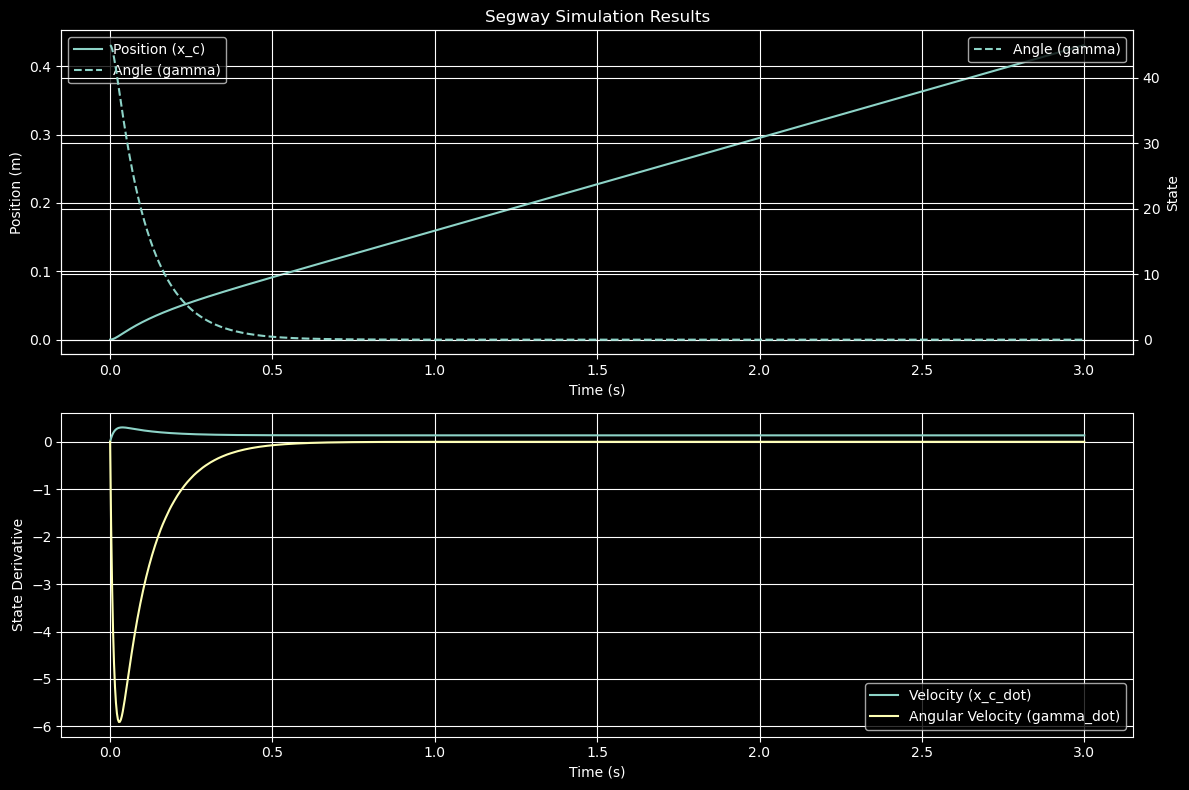

Exporting simulation results to CSV...


In [1]:
from Runner import run_simulation
from Parameters import params
from Config import CONTROL_MODE, MODEL_T
from math import pi

run_simulation(
    initial_state=[0.0, 0.0, pi/180 * 45, 0.0],
    time_span=(0, 3),
    control_mode=CONTROL_MODE.BALANCE,
    desired_gamma=0.0,
    model_type=MODEL_T.NONLINEAR,
    export_CSV_flag=True,
)

- Velocity Mode

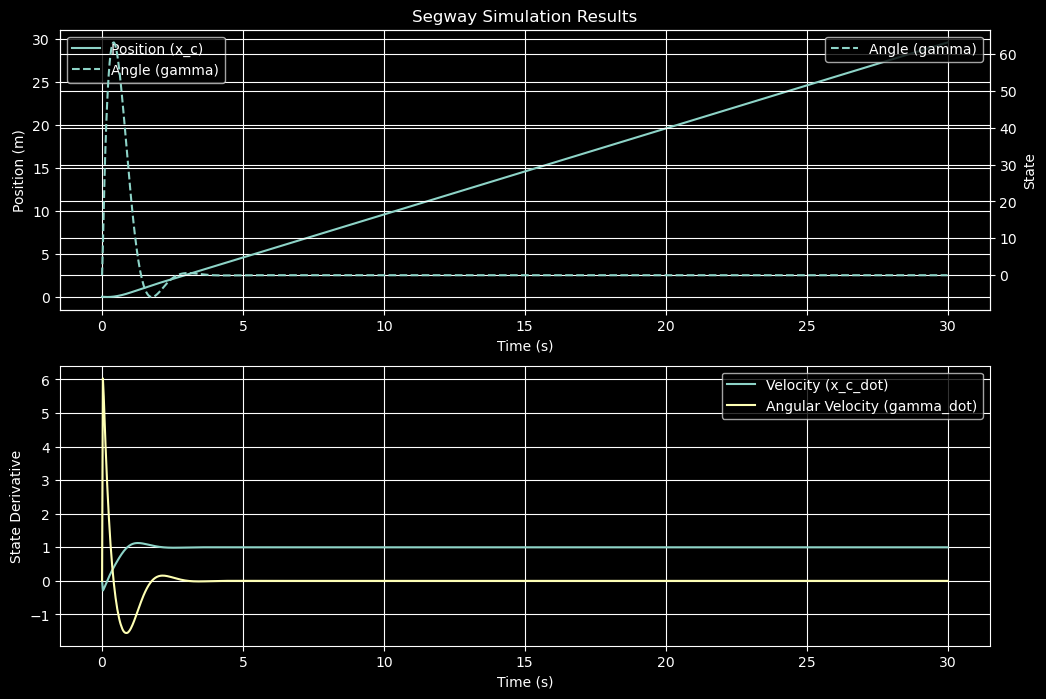

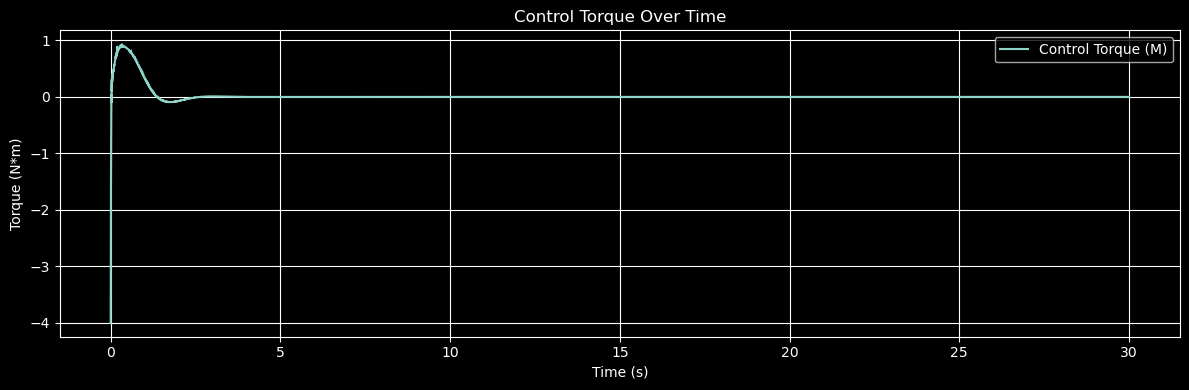

In [1]:
from Runner import run_simulation
from Parameters import params
from Config import CONTROL_MODE, MODEL_T, CONTROL_STRATEGY


run_simulation(
    initial_state=[0.0, 0.0, 0.0, 0.0],
    time_span=(0, 30),
    control_mode=CONTROL_MODE.VELOCITY,
    controller_type=CONTROL_STRATEGY.PD,
    desired_gamma=0.0,
    desired_velocity=1.0,
    model_type=MODEL_T.NONLINEAR,
    export_CSV_flag=True,
    record_Torque=True,
)

- Position Mode

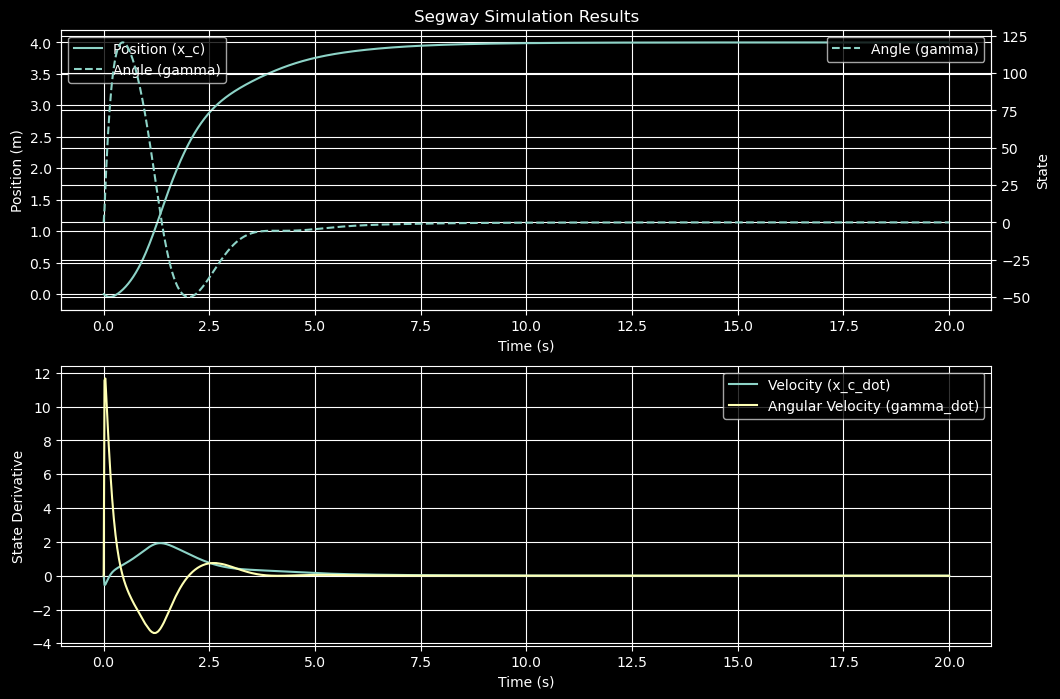

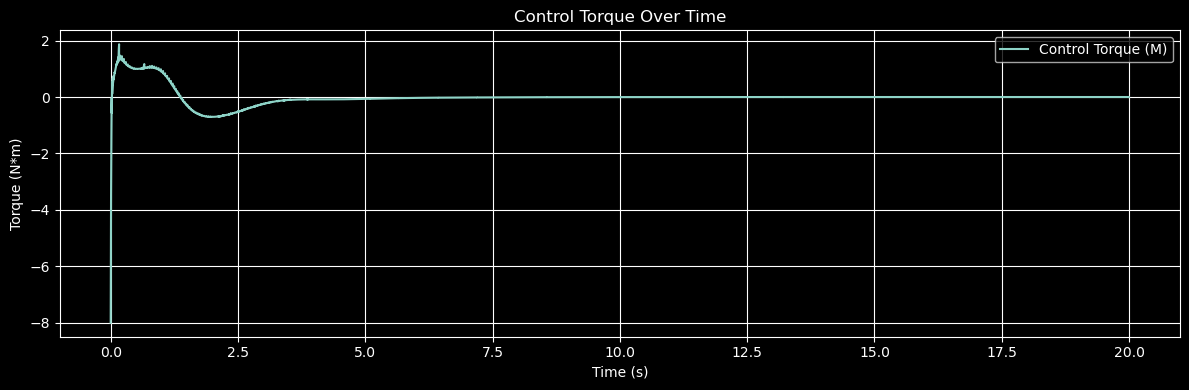

In [2]:
from Runner import run_simulation
from Parameters import params
from Config import CONTROL_MODE, MODEL_T

run_simulation(
    initial_state=[0.0, 0.0, 0.0, 0.0],
    time_span=(0, 20),
    control_mode=CONTROL_MODE.POSITION,
    desired_gamma=0.0,
    desired_velocity=0.0,
    desired_position=4.0,
    model_type=MODEL_T.NONLINEAR,
    export_CSV_flag=True,
    record_Torque=True,
)